# Data preprocessing
First of all you nedd to modify config 'make_config.yaml' where:  
**task:** datasest title e.g. cifar10, nuswide or coco  
**class_len:** class number of this task e.g. 10  
**save_labels:** whether to save images label (True or False)  
**feature_size:** length of the feature vector e.g. 2048  
**BS:** the batch size e.g. 256   
**weight_pth:** pretrain model weights if avalable e.g. result/cifar10new_v1/3_0.3593.h5. If not skip this one  


In [1]:
# Current dir
%pwd

'/home/ivan/dev/img_ret/TBH'

In [2]:
# go to TBH/raw_data
%cd 'raw_data'

/home/ivan/dev/img_ret/TBH/raw_data


In [3]:
!python make_data.py make_config4cifar10.yaml

/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib

### Results of preprocessing
Now we get data in 'TBH/data' in '.mat' format

In [4]:
# import pandas as pd

# pd.read_csv('./data/cifar10_train_pth_list.csv')

In [5]:
# import scipy.io
# mat = scipy.io.loadmat('./data/cifar10_train.mat')

In [6]:
# print(mat['data'].shape, mat['label'].shape)

# Training
Now modify train config in 'config' folder, 'train_cifar10.yaml'

In [7]:
# Go to TBH folder
%cd .. 

/home/ivan/dev/img_ret/TBH


In [2]:
!python main.py train_cifar10

/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib

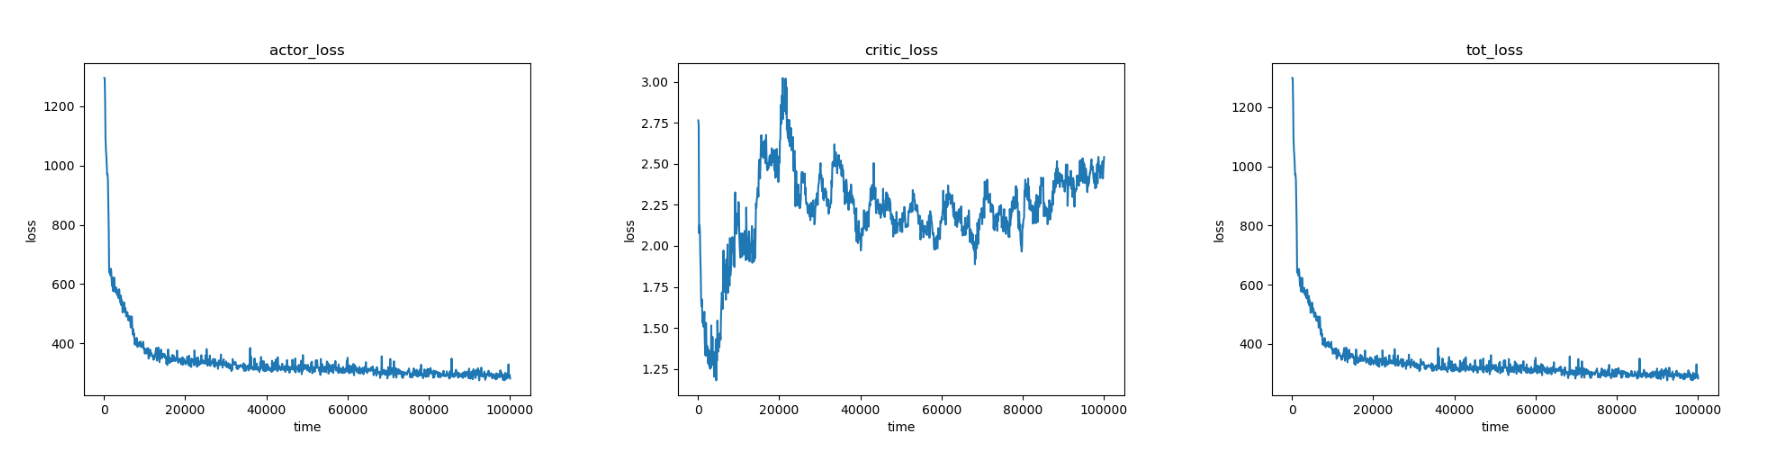

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ancor_loss_img = mpimg.imread('./data/log/cifar10_32bit/actor_loss.png')
critic_loss_img = mpimg.imread('./data/log/cifar10_32bit/critic_loss.png')
tot_loss_img = mpimg.imread('./data/log/cifar10_32bit/tot_loss.png')

fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=120)

ax[0].imshow(ancor_loss_img)
ax[1].imshow(critic_loss_img)
ax[2].imshow(tot_loss_img)
for i in range(3):
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### Results of training
- Will generate “Training loss record” and “Model weights”  
- Will be placed under “data/log” and “data/weights” separately
- Will be placed under specific folder name, the default is “{task}_{code_length}bit” e.g. “cifar10_32bit”

Log folder
- Store the training loss records
- actor_loss, actor_loss.png
- critic_loss, critic_loss.png
- tot_loss, tot_loss.png

Weights folder
- Store the trained model weights
- Name: model-{iteration}
- The method to load model and refer to model.py, which is written at _restore method of TBH class

# Evaluation
Now modify evaluation config in 'config' folder, 'infer.yaml  
and set 'usage' flag as 'usage: 1'

In [10]:
!python inference.py infer

/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ivan/tools/anaconda3/envs/tf36/lib

In [11]:
!python cal_map.py calmap

========== Config ==========
task:	cifar10
code_length:	32
at_top_k:	1000
Run 3000
test_code shape: (10000, 32), test_label shape: (10000, 10)
db_code shape: (50000, 32), db_label shape: (50000, 10)
3000: 0.44874451627143463
Run 6000
test_code shape: (10000, 32), test_label shape: (10000, 10)
db_code shape: (50000, 32), db_label shape: (50000, 10)
6000: 0.47965636063724365
Run 9000
test_code shape: (10000, 32), test_label shape: (10000, 10)
db_code shape: (50000, 32), db_label shape: (50000, 10)
9000: 0.5310490150558222
Run 12000
test_code shape: (10000, 32), test_label shape: (10000, 10)
db_code shape: (50000, 32), db_label shape: (50000, 10)
12000: 0.5440475701456614
Run 15000
test_code shape: (10000, 32), test_label shape: (10000, 10)
db_code shape: (50000, 32), db_label shape: (50000, 10)
15000: 0.5496152308322749
Run 18000
test_code shape: (10000, 32), test_label shape: (10000, 10)
db_code shape: (50000, 32), db_label shape: (50000, 10)
18000: 0.5480554240076322
Run 21000
test_cod

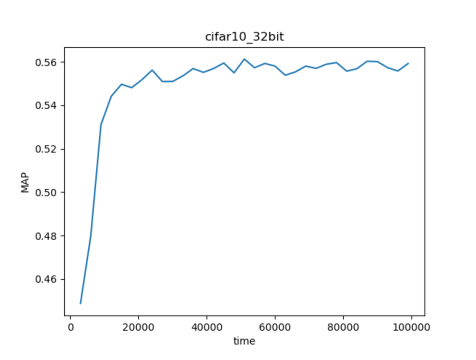

In [12]:
map_img = mpimg.imread('./data/result/cifar10_32bit.png')

plt.figure(figsize=(10,10), dpi=60)
plt.imshow(map_img)
plt.axis('off')
plt.show()

### Result of evaluation
- Generate image hashing vector
- Name: “{phase}_{task}_{iteration}.mat”  
    - e.g. “train_cifar10_32_18000.mat”
- Store Path: “data/code/{task}_{code_length}bit”  
    - e.g. “data/code/cifar10_32bit”

# Inference
Now modify evaluation config in 'config' folder, 'infer.yaml' for image retrivel   
set 'usage' flag as 'usage: 1'  
set 'model_weight' flag for model number you want to use e.g. 'model-18000'  


In [ ]:
!python inference.py infer

Next setup 'retrive.yaml' config and run

In [ ]:
!python retrieve.py retrieve

### Result of retrievel

In [ ]:
# map_img = mpimg.imread('./data/result/cifar10_32bit.png')

# plt.figure(figsize=(10,10), dpi=60)
# plt.imshow(map_img)
# plt.axis('off')
# plt.show()

In [ ]:
import numpy as np
import os
result_dir = 'retrieve_result/cifar10_32bit/'

folders = os.listdir(result_dir)
ret_dirs = np.random.choice(folders, 10)


fig, ax = plt.subplots(10,11, figsize=(10,10), dpi=120)

for i in range(len(ret_dirs)):
    file_names = sorted(os.listdir(result_dir+ret_dirs[i]), reverse=False)

    for j in range(len(file_names)):
        img = mpimg.imread(result_dir+ret_dirs[i]+'/'+file_names[j])
        ax[i,j].imshow(img)
        ax[i,j].axis('off')
        if i == 0:
            ax[i,j].set_title(file_names[j][:-4])
    